This is the sequel of training_dnn.ipynb.

Here, we will discuss about loading a trained network, forwarding data to it and how to extract features maps.

In [1]:
from astropy.io import fits as fits
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize']=[12,8]


In [2]:
## Set up the sys.path in order to be able to import our modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

First, you can load a model using load_model from Keras to load an hdf5 file containing a network (saved using save_model or a ModelCheckpoint also defined in Keras).

Otherwise, using the DeepNet class, you can call the constructor with the file.

In [3]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
# This line is optional, don't add it unless you really need to set a limit on the memory available for your process
# For instance, if you want to train 2 DNNs on the same GPU without one overlapping the memory needed by the other
# Change the value to set the percentage of memory allocated
config.gpu_options.per_process_gpu_memory_fraction = 0.5 

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

# Now you can create/load your DNN

Using TensorFlow backend.


In [4]:
# import numpy as np
# import matplotlib.pylab as plt
# from astropy.io import fits as fits
# from ellip_utils import compute_ellipticity_error



# def fits2npy(fits_file, idx_hdu):
#     '''Read .fits containing the psf'''
#     data = fits.getdata(fits_file, idx_hdu)
#     nb_gal_row = data.shape[0]//96
#     data_list = []
#     idx_list = range(0, 10000)
#     for i in idx_list:
#         y = (96*i)%(nb_gal_row*96)
#         x = i//nb_gal_row * 96
#         data_list.append(data[x:x+96,y:y+96])
#     return np.asarray(data_list)


# if __name__ == '__main__':

#     target = '/data/DeepDeconv/test10k_admm/target_hst.txt'
#     target_crop = '/data/DeepDeconv/test10k_admm/target_hst_crop.txt'
#     SNR = [20,40,60,100]
#     err_dnn = []
#     err_admm = []
#     err_new_admm = []
#     err_new_admm2 = []
#     err_new_admm3 = []
#     err_sparse = []
#     err_lowr = []
#     for s in SNR:
#         print(s)
#         dnn = '/data/DeepDeconv/test10k_admm/DenseNet_vsc_rangeSNR20to100_nol2norm_2025_SNR%d.txt'%s
#         admm = '/data/DeepDeconv/output_admm/admm_hst_gamma2_1048_tikhonet_SNR%d_denoisenet0p04.txt'%s
#         new_admm = '/data/DeepDeconv/output_admm/admm_hst_gamma1_1024_tikhonet_SNR%d_rhocap400_gamma1p4_denoisenet0p04.txt'%s
#         new_admm2 = '/data/DeepDeconv/output_admm/admm_hst_1024_SNR%s_rhocap200_gamma1p4_denoisenet0p04.txt'%s
#         new_admm3 = '/data/DeepDeconv/output_admm/admm_hst_1024_SNR%s_rhocap800_gamma1p4_denoisenet0p04.txt'%s
#         sparse = '/data/DeepDeconv/test10k_admm/sparse_VSC_2025_SNR%d.txt'%s
#         lowr = '/data/DeepDeconv/test10k_admm/lowr_VSC_2025_SNR%d.txt'%s
#         err_dnn.append(compute_ellipticity_error(target, dnn, max_idx=2025))
#         err_admm.append(compute_ellipticity_error(target, admm, max_idx=1024))
#         err_new_admm.append(compute_ellipticity_error(target, new_admm, max_idx=1024))
#         err_new_admm2.append(compute_ellipticity_error(target, new_admm2, max_idx=1024))
#         err_new_admm3.append(compute_ellipticity_error(target, new_admm3, max_idx=1024))
#         err_sparse.append(compute_ellipticity_error(target_crop, sparse, max_idx=2025))
#         err_lowr.append(compute_ellipticity_error(target_crop, lowr, max_idx=2025))
        
#     plt.figure(figsize=(12,8))
#     plt.plot(SNR, [np.median(e) for e in err_dnn], '-o', label='Tikhonov+DNN')
#     plt.plot(SNR, [np.median(e) for e in err_admm], '--d', label='ADMM+DNN')
#     plt.plot(SNR, [np.median(e) for e in err_new_admm], '--d', label='new ADMM+DNN rhomax=400')
#     plt.plot(SNR, [np.median(e) for e in err_new_admm2], '--d', label='new ADMM+DNN rhomax=200')
#     plt.plot(SNR, [np.median(e) for e in err_new_admm3], '--d', label='new ADMM+DNN rhomax=800')
# #    plt.plot(SNR, [np.median(e) for e in err_sparse], ':*', label='Sparse')
# #    plt.plot(SNR, [np.median(e) for e in err_lowr], '-.v', label='Low-rank')
#     plt.xlabel('SNR')
#     plt.ylabel('Ellipticity error')
#     plt.legend()
#     plt.show()
# #
# #    target = '/data/DeepDeconv/test10k_admm/target_hst_crop_2025_positive.fits'
# #    target_1024 = '/data/DeepDeconv/test10k_admm/target_hst_crop_1024_positive.fits'
# #    err_dnn = []
# #    err_admm = []
# #    err_new_admm = []
# #    err_new_admm2 = []
# #    err_new_admm3 = []
# #    err_sparse = []
# #    err_lowr = []
# #    for s in SNR:
# #        print(s)
# #        dnn = '/data/DeepDeconv/test10k_admm/DenseNet_vsc_rangeSNR20to100_nol2norm_2025_SNR%d.fits'%s
# #        admm = '/data/DeepDeconv/output_admm/admm_hst_gamma2_1048_tikhonet_SNR%d_denoisenet0p04.fits'%s
# #        new_admm = '/data/DeepDeconv/output_admm/admm_hst_gamma1_1024_tikhonet_SNR%d_rhocap400_gamma1p4_denoisenet0p04.fits'%s
# #        new_admm2 = '/data/DeepDeconv/output_admm/admm_hst_1024_SNR%s_rhocap200_gamma1p4_denoisenet0p04.fits'%s
# #        new_admm3 = '/data/DeepDeconv/output_admm/admm_hst_1024_SNR%s_rhocap800_gamma1p4_denoisenet0p04.fits'%s
# #        sparse = '/data/DeepDeconv/sf_code/output/sparse_VSC_SNR%d_primal.fits'%s
# #        lowr = '/data/DeepDeconv/sf_code/output/lowr_VSC_SNR%d_primal.fits'%s
# #        err_dnn.append(compute_pixel_error(target, dnn, nb_gal=2025))
# #        err_admm.append(compute_pixel_error(target_1024, admm, nb_gal=1024))
# #        err_new_admm.append(compute_pixel_error(target_1024, new_admm, nb_gal=1024))
# #        err_new_admm2.append(compute_pixel_error(target_1024, new_admm2, nb_gal=1024))
# #        err_new_admm3.append(compute_pixel_error(target_1024, new_admm3, nb_gal=1024))
# #        err_sparse.append(compute_pixel_error(target, sparse, gal_dim=41, nb_gal=2025))
# #        err_lowr.append(compute_pixel_error(target, lowr, gal_dim=41, nb_gal=2025))
# #        
# #    plt.figure(figsize=(12,8))
# #    plt.plot(SNR, [np.median(e) for e in err_dnn], '-o', label='Tikhonov+DNN')
# #    plt.plot(SNR, [np.median(e) for e in err_admm], '--d', label='ADMM+DNN')
# #    plt.plot(SNR, [np.median(e) for e in err_new_admm], '--d', label='new ADMM+DNN rhomax=400')
# #    plt.plot(SNR, [np.median(e) for e in err_new_admm2], '--d', label='new ADMM+DNN rhomax=200')
# #    plt.plot(SNR, [np.median(e) for e in err_new_admm3], '--d', label='new ADMM+DNN rhomax=800')
# ##    plt.plot(SNR, [np.median(e) for e in err_sparse], ':*', label='Sparse')
# ##    plt.plot(SNR, [np.median(e) for e in err_lowr], '-.v', label='Low-rank')
# #    plt.xlabel('SNR')
# #    plt.ylabel('Pixel error')
# #    plt.legend()
# #    plt.show()


In [5]:
"""
Based on code written by alechat
"""

import os
import numpy as np
from subprocess import Popen, PIPE

def fits2npy(fits_file, idx_hdu):
    '''Read .fits containing the psf'''
    data = fits.getdata(fits_file, idx_hdu)
    nb_gal_row = data.shape[0]//96
    data_list = []
    idx_list = range(0, 10000)
    for i in idx_list:
        y = (96*i)%(nb_gal_row*96)
        x = i//nb_gal_row * 96
        data_list.append(data[x:x+96,y:y+96])
    return np.asarray(data_list)

def StampCollection2Mosaic(stamplist,gal_dim=96,nb_gal=10000):
    nb_gal_row = int(np.sqrt(nb_gal)) #nb galaxies per row
    mosaic=np.empty((nb_gal_row*gal_dim,nb_gal_row*gal_dim))
    for i in range(nb_gal):
        y = (gal_dim*i)%(nb_gal_row*gal_dim)
        x = i//nb_gal_row * gal_dim
        mosaic[x:x+gal_dim,y:y+gal_dim]=stamplist[i,:,:,0]
    return mosaic   

def compute_pixel_error(target_file, hdu_target, reconst_file, gal_dim=96, nb_gal=10000,xslice=slice(28,69,1),yslice=slice(28,69,1)):
    '''
    X: ground truth
    Y: estimated images
    '''
    nb_gal_row = int(np.sqrt(nb_gal)) #nb galaxies per row
    X = fits.getdata(target_file,hdu_target)
    Y = fits.getdata(reconst_file)
    DIFF=X-Y
    err = []
    for i in range(nb_gal):
        y = (gal_dim*i)%(nb_gal_row*gal_dim)
        x = i//nb_gal_row * gal_dim
        if gal_dim == 96:
            err.append((np.linalg.norm((DIFF[x:x+gal_dim,y:y+gal_dim])[xslice, 
                        yslice])**2)/(np.linalg.norm(X[x:x+gal_dim,y:y+gal_dim][xslice, yslice])**2))
        else:
            err.append((np.linalg.norm(DIFF[x:x+gal_dim,y:y+gal_dim])**2)/(np.linalg.norm(X[x:x+gal_dim,y:y+gal_dim])**2))
    return err

def generate_shape_txt(gal_file, psf_file, output_file, gal_dim=96, mosaic_size=100, save_weights='', weights_input=''):
    print('Computing ellipticity for file: %s'%(gal_file))
    print('Saving result in: %s'%(output_file))
    executable = '/data/shapelens_v2/shapelens-CEA-master/bin/get_shapes'
    if weights_input in '-o-i':
        cmd = '%s %s %s -p %s -g %d -s %d -T %s | tee %s'%(executable, weights_input, save_weights, psf_file, mosaic_size, gal_dim, gal_file, output_file)
    else:
        cmd = '%s -p %s -g %d -s %d -T %s | tee %s'%(executable, psf_file, mosaic_size, gal_dim, gal_file, output_file)
    print(cmd)
    cmd_file = 'get_shape.cmd'
    try:
        os.remove(cmd_file)
    except OSError:
        pass
    f = open(cmd_file, 'w')
    f.write('#! /bin/bash\n')
    f.write('source /home/fsureau/.bashrc\n')
    f.write(cmd)
    f.close()
    os.system('chmod 777 '+cmd_file)
    p = Popen('./'+cmd_file, stdout=PIPE, stderr=PIPE)
    stdout, stderr = p.communicate()
    return stdout, stderr

def get_target_shape(gal_file, output_file, idx=4):
    tmp_file = 'tmp'+str(np.random.randint(999))+'.fits'
    tmp_psf_file = 'tmp_psf'+str(np.random.randint(999))+'.fits'
    try:
        os.remove(tmp_file)
    except OSError:
        pass
    try:
        os.remove(tmp_psf_file)
    except OSError:
        pass
    images = fits.getdata(gal_file, idx)
    psfs = fits.getdata(gal_file, 3)
    fits.writeto(tmp_file, images)
    fits.writeto(tmp_psf_file, psfs)
    stdout, stderr = generate_shape_txt(tmp_file, tmp_psf_file, output_file)
    try:
        os.remove(tmp_file)
    except OSError:
        pass
    try:
        os.remove(tmp_psf_file)
    except OSError:
        pass
    return stdout, stderr

def get_ellipticity(file_name):
    ellip = []
    with open(file_name, 'r') as f:
        data = f.readlines()
    for l in data:
        ellip.append(np.array(l.split('\t')[3:5]).astype(np.float32))
    return np.asarray(ellip)

def compute_ellipticity_error(fileX, fileY, plot_hist=False, max_idx=10000):
    ellipX = get_ellipticity(fileX)[:max_idx]
    ellipY = get_ellipticity(fileY)[:max_idx]
    err = []
    for i in range(len(ellipY)):
        if (np.abs(ellipX[i]) > 1).any() or (np.abs(ellipY[i]) > 1).any():
            continue
        err.append(np.linalg.norm(ellipX[i]-ellipY[i]))
    if plot_hist:
        plt.figure()
        plt.hist(err, 100, range=(0,0.6))
        plt.show()
        print('Total samples = %d' %len(err))
    return err


def oracle_ellip(input_file, output_file, noise_std = 0):
    data = fits.getdata(input_file, 1)
    psf = fits.getdata(input_file, 3)
    if noise_std != 0:
        noise = np.random.normal(0, noise_std, size=data.shape)
        data += noise
    tmp_file = 'tmp'+str(np.random.randint(999))+'.fits'
    tmp_psf_file = 'tmp_psf'+str(np.random.randint(999))+'.fits'
    try:
        os.remove(tmp_file)
    except OSError:
        pass
    try:
        os.remove(tmp_psf_file)
    except OSError:
        pass
    fits.writeto(tmp_file, data)
    fits.writeto(tmp_psf_file, psf)
    generate_shape_txt(tmp_file, tmp_psf_file, output_file)
    try:
        os.remove(tmp_file)
    except OSError:
        pass
    try:
        os.remove(tmp_psf_file)
    except OSError:
        pass

In [6]:
# Input the hdf5 file, here we load a network trained on Tikhonov
#net_file = '/data/DeepDeconv/model/DenseNet_vsc_rangeSNR20to100_nol2norm.hdf5'
net_path= '/home/fsureau/programs/DeepDeconv/'
#net_file = 'DeconvNetRef_FCS_train2to20_val1_vsc_rangeSNR20to100.hdf5'
#net_file = 'UNet2D_FCS_sc2_layer2x2_relu_filt8_resNet.hdf5'
net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_reshfl_SNR20to100.hdf5'
net_root=net_file.replace('.hdf5','')

### Method 1
#from keras.models import load_model
#dnn = load_model(net_file) #dnn is instance of the model class

### Method 2
#from DeepDeconv.deepnet.DeepNet import DeepNet
#dnn = DeepNet(model_file=net_path+net_file) #dnn is instance of DeepNet class

## Construct test prediction

To forward data through the network use the predict method available for both classes. For the method 2:

In [14]:
from DeepDeconv.deepnet.DeepNet import DeepNet
from DeepDeconv.utils.batch_utils import get_batch_from_fits
import numpy as np

# Input the file containing the galaxies and psfs for testing
#testset_path = '/data/DeepDeconv/data/vsc_euclidpsfs/'
#testset_file = 'image-000-0.fits'
testset_path = '/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/'
testset_file = 'image-shfl-0-multihdu.fits'
noiseless_img_hdu = 0
psf_hdu = 1
targets_hdu = 2

data_directory = '/data/DeepDeconv/data/vsc_euclidpsfs/'

SNR_list_sim=[20,40,60,80,100]


net_path= '/home/fsureau/programs/DeepDeconv/'
#net_file = 'DeconvNetRef_FCS_train2to20_val1_vsc_rangeSNR20to100.hdf5'
#net_file = 'UNet2D_FCS_sc2_layer2x2_relu_filt8_resNet.hdf5'
#net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_reshfl_SNR20to100.hdf5'
net_file='DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100.hdf5'
net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_resNet_reshfl_SNR20to100.hdf5'
dnn = DeepNet(model_file=net_path+net_file) #dnn is instance of DeepNet class

# Create the set of test with 10 observations at SNR 50
write_path="/data/DeepDeconv/benchmark/euclidpsf/"
for SNR_sim in SNR_list_sim:
    test_data, target_data = get_batch_from_fits(testset_path+testset_file, idx_list=np.arange(10000), SNR=SNR_sim,
                        noiseless_img_hdu=noiseless_img_hdu, targets_hdu=targets_hdu, psf_hdu=psf_hdu,
                        image_dim=96, image_per_row=100,
                        deconv_mode='TIKHONOV')

    dnn_reconstruction = dnn.predict(test_data, verbose=1)
    mosaic=StampCollection2Mosaic(dnn_reconstruction)
    hdu_dnn=fits.PrimaryHDU(mosaic)
    hdul = fits.HDUList([hdu_dnn])
    mosaic_name=testset_file.replace('.fits','-'+net_file.replace('.hdf5','_testSNR{0}.fits'.format(SNR_sim)))
    hdul.writeto(write_path+'images/'+mosaic_name,overwrite=True)


net_file=DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_atrou_reshfl_SNR20to100_reshfl_SNR20to100.hdf5
net_file=DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100.hdf5
image-shfl-0-multihdu-DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100_testSNR20.fits exists
image-shfl-0-multihdu-DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100_testSNR40.fits exists
image-shfl-0-multihdu-DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100_testSNR60.fits exists
image-shfl-0-multihdu-DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100_testSNR80.fits exists
image-shfl-0-multihdu-DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100_testSNR100.fits exists
net_file=DeconvNet2D_FCS_sc4_layer4x5x6x7_relu_growthRate12_reshfl_SNR20to100.hdf5
net_file=DeconvNet2D_FCS_sc4_layer4x5x6x7_swish_growthRate12_reshfl_SNR20to100.hdf5
net_file=DeconvNet2D_FCS_sc4_layer5x5x5x5_relu_growthRate12_reshfl_SNR20to100.hdf5
net_file

In [61]:
#im0=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-0-multihdu.fits",0)
#im1=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-0-multihdu.fits",1)
im2=fits.getdata("/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-0-multihdu.fits",2)
#plt.imshow(im0[0:192,0:192])
#plt.figure()
#plt.imshow(im1[0:192,0:192])
#plt.figure()
#plt.imshow(im2[0:192,0:192])
#Create target file and save it
hdu_target=fits.PrimaryHDU(im2)
hdul = fits.HDUList([hdu_target])
target_name=testset_file.replace('.fits','-target_fwhm0p07.fits')
hdul.writeto(write_path+'images/'+target_name,overwrite=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6e42b11ef0>,
 <matplotlib.colorbar.Colorbar at 0x7f6e42a9b898>)

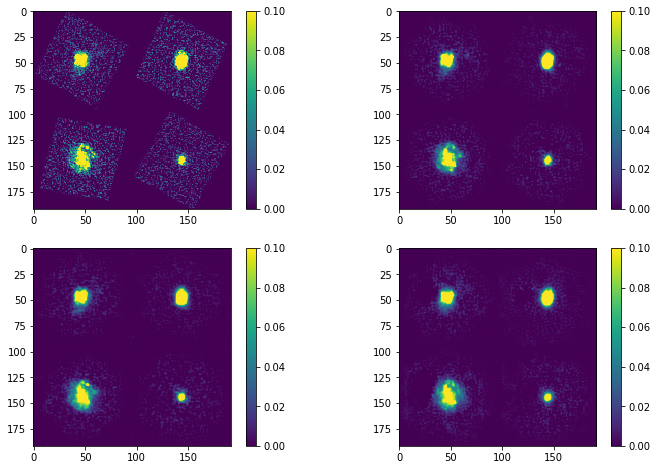

In [63]:
#Explore various results:
write_path="/data/DeepDeconv/benchmark/euclidpsf/"
target_name=testset_file.replace('.fits','-target_fwhm0p07.fits')
SNR=100
target=fits.getdata(write_path+'images/'+target_name)
unet4x4x4_name=write_path+"images/image-shfl-0-multihdu-UNet2D_FCS_sc3_layer4x4x4_relu_filt16_reshfl_SNR20to100_testSNR{0}.fits".format(SNR)
unet4x4x4=fits.getdata(unet4x4x4_name)
unet4x4x4_res_name=write_path+"images/image-shfl-0-multihdu-UNet2D_FCS_sc3_layer4x4x4_relu_filt16_resNet_reshfl_SNR20to100_testSNR{0}.fits".format(SNR)
unet4x4x4_res=fits.getdata(unet4x4x4_res_name)
deconvnet_name=write_path+"images/image-shfl-0-multihdu-DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100_testSNR{0}.fits".format(SNR)
deconvnet=fits.getdata(deconvnet_name)

plt.subplot(2,2,1),plt.imshow(target[0:192,0:192],vmin=0,vmax=0.1),plt.colorbar()
plt.subplot(2,2,2),plt.imshow(unet4x4x4[0:192,0:192],vmin=0,vmax=0.1),plt.colorbar()
plt.subplot(2,2,3),plt.imshow(unet4x4x4_res[0:192,0:192],vmin=0,vmax=0.1),plt.colorbar()
plt.subplot(2,2,4),plt.imshow(deconvnet[0:192,0:192],vmin=0,vmax=0.1),plt.colorbar()


## Pixel Error

In [59]:
#net_file = 'DeconvNetRef_FCS_train2to20_val1_vsc_rangeSNR20to100.hdf5'
#net_file = 'UNet2D_FCS_sc2_layer2x2_relu_filt8_resNet.hdf5'
net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_reshfl_SNR20to100.hdf5'
#net_file='DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100.hdf5'
#net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_resNet_reshfl_SNR20to100.hdf5'
testset_file = 'image-shfl-0-multihdu.fits'
target_name=testset_file.replace('.fits','-target_fwhm0p07.fits')

SNR_list_sim=[20,40,60,80,100]

# Create the set of test with 10 observations at SNR 50
write_path="/data/DeepDeconv/benchmark/euclidpsf/"
for SNR_sim in SNR_list_sim:
    mosaic_name=testset_file.replace('.fits','-'+net_file.replace('.hdf5','_testSNR{0}.fits'.format(SNR_sim)))
    err=compute_pixel_error(write_path+target_name, 0, write_path+'images/'+mosaic_name, gal_dim=96, nb_gal=10000,xslice=slice(28,69,1),yslice=slice(28,69,1))
    np.savetxt(write_path+'stats/'+mosaic_name.replace('.fits','_pixelerr.txt'),np.array(err))
    print("SNR=",SNR_sim,"MEAN_ERR=",np.mean(err),"MEDIAN_ERR=",np.median(err))

#UNet2D_FCS_sc3_layer4x4x4_relu_filt16_reshfl_SNR20to100.hdf5
# SNR= 20 MEAN_ERR= 0.1607606500646058 MEDIAN_ERR= 0.15032449213024834
# SNR= 40 MEAN_ERR= 0.1279219161545897 MEDIAN_ERR= 0.11590834949057344
# SNR= 60 MEAN_ERR= 0.11495567474253007 MEDIAN_ERR= 0.10353804745581284
# SNR= 80 MEAN_ERR= 0.10683021926941738 MEDIAN_ERR= 0.09564384307829447
# SNR= 100 MEAN_ERR= 0.10113745615643505 MEDIAN_ERR= 0.09100128286384992

#UNet2D_FCS_sc3_layer4x4x4_relu_filt16_resNet_reshfl_SNR20to100.hdf5
# SNR= 20 MEAN_ERR= 0.16305500953150678 MEDIAN_ERR= 0.15269181529387643
# SNR= 40 MEAN_ERR= 0.12823250196314506 MEDIAN_ERR= 0.11662489517575572
# SNR= 60 MEAN_ERR= 0.11516274430024648 MEDIAN_ERR= 0.10391465803592373
# SNR= 80 MEAN_ERR= 0.10737511005346291 MEDIAN_ERR= 0.09626865154821254
# SNR= 100 MEAN_ERR= 0.10185287078357237 MEDIAN_ERR= 0.09094960580740016

#DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100.hdf5
# SNR= 20 MEAN_ERR= 0.16173035606494285 MEDIAN_ERR= 0.15178229720001604
# SNR= 40 MEAN_ERR= 0.1277033696852865 MEDIAN_ERR= 0.11610745793922872
# SNR= 60 MEAN_ERR= 0.11504851127151164 MEDIAN_ERR= 0.1027031862248386
# SNR= 80 MEAN_ERR= 0.10860917000597099 MEDIAN_ERR= 0.09606153330168321
# SNR= 100 MEAN_ERR= 0.10495943773938375 MEDIAN_ERR= 0.09188616278013079


SNR= 20 MEAN_ERR= 0.1607606500646058 MEDIAN_ERR= 0.15032449213024834
SNR= 40 MEAN_ERR= 0.1279219161545897 MEDIAN_ERR= 0.11590834949057344
SNR= 60 MEAN_ERR= 0.11495567474253007 MEDIAN_ERR= 0.10353804745581284
SNR= 80 MEAN_ERR= 0.10683021926941738 MEDIAN_ERR= 0.09564384307829447
SNR= 100 MEAN_ERR= 0.10113745615643505 MEDIAN_ERR= 0.09100128286384992


## ELLIP ERROR

In [65]:
#Create Mosaic and save it
testset_file = 'image-shfl-0-multihdu.fits'
target_name=testset_file.replace('.fits','-target_fwhm0p07.fits')
save_weights=write_path+'ellip/'+target_name.replace('.fits','_weights.fits')

#perform target ellipticity measurements
psf_file="/data/DeepDeconv/data/gauss_fwhm0p07/starfield_image-000-0.fits"
ellip_filename=write_path+'ellip/'+target_name.replace('.fits','ellipmes.txt')
generate_shape_txt(write_path+'images/'+target_name, psf_file, ellip_filename, mosaic_size=100, save_weights=save_weights, weights_input='-o')

Computing ellipticity for file: /data/DeepDeconv/benchmark/euclidpsf/images/image-shfl-0-multihdu-target_fwhm0p07.fits
Saving result in: /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07ellipmes.txt
/data/shapelens_v2/shapelens-CEA-master/bin/get_shapes -o /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07_weights.fits -p /data/DeepDeconv/data/gauss_fwhm0p07/starfield_image-000-0.fits -g 100 -s 96 -T /data/DeepDeconv/benchmark/euclidpsf/images/image-shfl-0-multihdu-target_fwhm0p07.fits | tee /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07ellipmes.txt


(b'1\t48\t48\t0.00217532\t-0.0990235\t4\t2.14377\n2\t144\t48\t-0.0868222\t-0.0193296\t3\t3.66785\n3\t240\t48\t-0.335339\t-0.62261\t2.5\t1.23082\n4\t336\t48\t-0.0130618\t0.243101\t2\t2.22973\n5\t432\t48\t0.148726\t-0.0550964\t5\t1.82744\n6\t528\t48\t0.246587\t0.239886\t2\t3.4553\n7\t624\t48\t0.202629\t0.144355\t2.5\t1.64652\n8\t720\t48\t0.136645\t-0.0109528\t2\t3.78529\n9\t816\t48\t-0.0316236\t0.149965\t3.5\t1.81949\n10\t912\t48\t0.0175517\t-0.281244\t4\t3.68837\n11\t1008\t48\t-0.566529\t-0.0911578\t3.5\t5.21176\n12\t1104\t48\t-0.0715143\t-0.30082\t4\t1.56569\n13\t1200\t48\t-0.531983\t-0.107333\t2\t1.62122\n14\t1296\t48\t0.182788\t-0.17309\t3\t1.25121\n15\t1392\t48\t-0.178235\t0.184459\t2\t1.91305\n16\t1488\t48\t-0.307351\t0.0987345\t4\t2.26923\n17\t1584\t48\t-0.0191802\t0.571993\t2\t4.69201\n18\t1680\t48\t0.213186\t0.170653\t2\t3.38878\n19\t1776\t48\t0.0906954\t-0.266305\t6\t1.45326\n20\t1872\t48\t0.0776234\t-0.0801385\t5\t2.95799\n21\t1968\t48\t-0.097129\t-0.0668142\t2\t5.61688\n22\t2

In [66]:
psf_file="/data/DeepDeconv/data/gauss_fwhm0p07/starfield_image-000-0.fits"
ellip_filename=write_path+'ellip/'+target_name.replace('.fits','ellipmes.txt')
save_weights=write_path+'ellip/'+target_name.replace('.fits','_weights.fits')

SNR_list_sim=[20,40,60,80,100]
for SNR_sim in SNR_list_sim:
    mosaic_name=target_name.replace('.fits','_SNR{0}.fits'.format(SNR_sim))
    ellip_filename=write_path+'ellip/'+mosaic_name.replace('.fits','ellipmes_targetweights.txt')
    generate_shape_txt(write_path+mosaic_name, psf_file, ellip_filename, mosaic_size=100, save_weights=save_weights, weights_input='-i')

Computing ellipticity for file: /data/DeepDeconv/benchmark/euclidpsf/image-shfl-0-multihdu-target_fwhm0p07_SNR20.fits
Saving result in: /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07_SNR20ellipmes_targetweights.txt
/data/shapelens_v2/shapelens-CEA-master/bin/get_shapes -i /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07_weights.fits -p /data/DeepDeconv/data/gauss_fwhm0p07/starfield_image-000-0.fits -g 100 -s 96 -T /data/DeepDeconv/benchmark/euclidpsf/image-shfl-0-multihdu-target_fwhm0p07_SNR20.fits | tee /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07_SNR20ellipmes_targetweights.txt
Computing ellipticity for file: /data/DeepDeconv/benchmark/euclidpsf/image-shfl-0-multihdu-target_fwhm0p07_SNR40.fits
Saving result in: /data/DeepDeconv/benchmark/euclidpsf/ellip/image-shfl-0-multihdu-target_fwhm0p07_SNR40ellipmes_targetweights.txt
/data/shapelens_v2/shapelens-CEA-master/bin/get_shapes -i /dat

In [ ]:
#net_file = 'DeconvNetRef_FCS_train2to20_val1_vsc_rangeSNR20to100.hdf5'
#net_file = 'UNet2D_FCS_sc2_layer2x2_relu_filt8_resNet.hdf5'
#net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_reshfl_SNR20to100.hdf5'
#net_file='DeconvNet2D_FCS_sc3_layer4x5x6_relu_growthRate12_reshfl_SNR20to100.hdf5'
net_file='UNet2D_FCS_sc3_layer4x4x4_relu_filt16_resNet_reshfl_SNR20to100.hdf5'
testset_file = 'image-shfl-0-multihdu.fits'
target_name="images/target-shfl-0-multihdu.fits"

SNR_list_sim=[20,40,60,80,100]

# Create the set of test with 10 observations at SNR 50
write_path="/data/DeepDeconv/benchmark/euclidpsf/"
for SNR_sim in SNR_list_sim:
    mosaic_name=testset_file.replace('.fits','-'+net_file.replace('.hdf5','_testSNR{0}.fits'.format(SNR_sim)))
    err=compute_pixel_error(write_path+target_name, 0, write_path+'images/'+mosaic_name, gal_dim=96, nb_gal=10000,xslice=slice(28,69,1),yslice=slice(28,69,1))
    np.savetxt(write_path+'stats/'+mosaic_name.replace('.fits','_pixelerr.txt'),np.array(err))
    print("SNR=",SNR_SIM,"MEAN_ERR=",np.mean(err))


In [ ]:
#perform DNN ellipticity measurements
psf_file="/data/DeepDeconv/data/gauss_fwhm0p07/starfield_image-000-0.fits"
ellip_filename=write_path+'ellip/'+mosaic_name.replace('.fits','ellipmes_targetweights.txt')
generate_shape_txt(write_path+mosaic_name, psf_file, ellip_filename, mosaic_size=100, save_weights=save_weights, weights_input='-i')



In [94]:
err=compute_pixel_error(write_path+target_name, 0, write_path+write_name, gal_dim=96, nb_gal=10000,xslice=slice(28,69,1),yslice=slice(28,69,1))
np.savetxt(write_path+'stats/'+write_name.replace('.fits','_pixelerr.txt'),np.array(err))



In [90]:
len(err)

10000

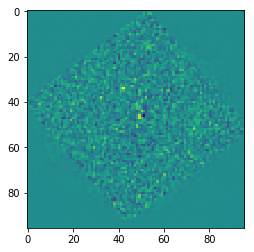

In [82]:
plt.imshow((X-ddt)[0:96,96:192])

TypeError: Invalid dimensions for image data

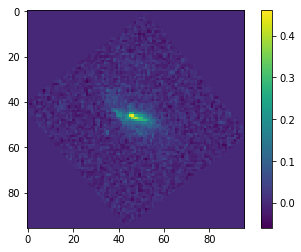

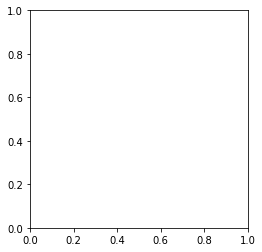

In [55]:
nb_gal_row = 100
X = fits.getdata(testset_path+testset_file,4)
Y = fits.getdata(write_path+write_name)
gal_dim=96
err = []
#for i in range(10000):
#    y = (gal_dim*i)%(nb_gal_row*gal_dim)
#    x = i//nb_gal_row * gal_dim
#    err.append((np.linalg.norm(X[x:x+gal_dim,y:y+gal_dim]-Y[x:x+gal_dim,y:y+gal_dim][xslice, 
#                        yslice])**2)/(np.linalg.norm(X[x:x+gal_dim,y:y+gal_dim][xslice, yslice])**2))

plt.imshow(X[0:96,0:96]),plt.colorbar()
plt.figure()
plt.imshow(Y[0:96,0:96]),plt.colorbar()




(<Figure size 432x288 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fa8c0f75860>)

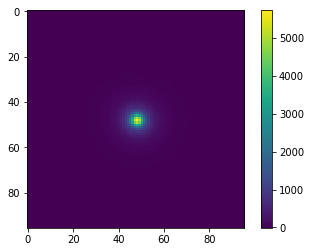

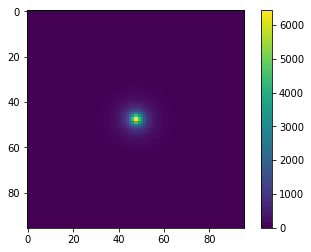

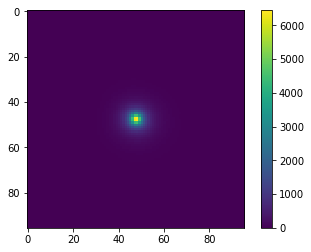

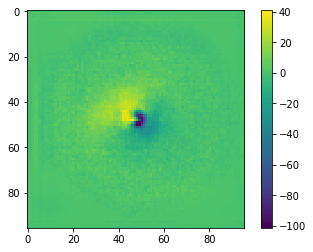

In [30]:
from matplotlib import pyplot as plt
plt.figure(),plt.imshow(np.sum(test_data[:,:,:,0],axis=0)),plt.colorbar()
plt.figure(),plt.imshow(np.sum(target_data[:,:,:,0],axis=0)),plt.colorbar()
plt.figure(),plt.imshow(np.sum(dnn_reconstruction[:,:,:,0],axis=0)),plt.colorbar()
plt.figure(),plt.imshow(np.sum(target_data[:,:,:,0]-dnn_reconstruction[:,:,:,0],axis=0)),plt.colorbar()#SNR=20,Oriented, [-70->80]

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f9b730b94a8>)

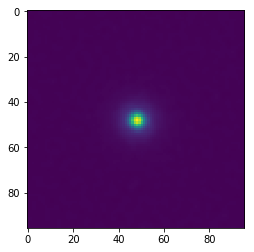

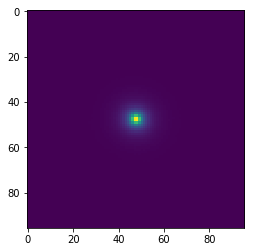

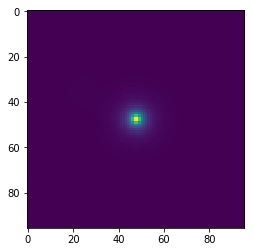

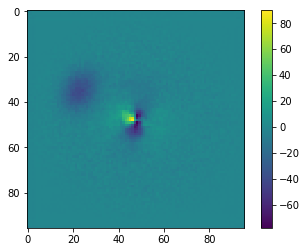

In [7]:
from matplotlib import pyplot as plt
plt.figure(),plt.imshow(np.sum(test_data[:,:,:,0],axis=0)),plt.colorbar()
plt.figure(),plt.imshow(np.sum(target_data[:,:,:,0],axis=0)),plt.colorbar()
plt.figure(),plt.imshow(np.sum(dnn_reconstruction[:,:,:,0],axis=0)),plt.colorbar()
plt.figure(),plt.imshow(np.sum(target_data[:,:,:,0]-dnn_reconstruction[:,:,:,0],axis=0)),plt.colorbar()#SNR=20,Oriented, [-70->80]



The DeepNet class also provides a method to extract intermediate features maps:

    get_layer_output(test_data, layer_idx)
    
layer_idx (int): idx of the layer whose features maps will be extracted.

Use dnn.model.summary() to retrieve the layers list.

In [31]:
dnn.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 96, 96, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 96, 96, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 96, 96, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
separable_

In [ ]:
del dnn
k.clear_session()


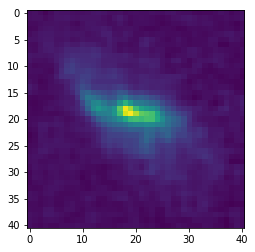

In [45]:
plt.imshow(dnn_reconstruction[0,slice(28,69,1),slice(28,69,1),0])


In [ ]:
# Suppose we want the last concatenation layer
idx = -4

# We print the name to check if you have the correct layer
print(dnn.model.layers[idx].name)

# We extract the features maps for the same data set as above.
# The layer has 48 neurons so we get an output of shape (10,96,96,48)
feat_maps = dnn.get_layer_output(test_data, layer_idx=idx)
print(feat_maps.shape)